## 1. Standard Import

In [1]:
from IPython import display

import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional  as F
from scipy.signal import convolve2d

In [4]:
# for getting summary info on models
from torchsummary import summary

In [5]:
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

## 2. Import the data

### (i) MNIST dataset

In [6]:
# import dataset (comes with colab!)
mnist = pd.read_csv("Mnist_combined.csv", index_col=0)

In [7]:
mnist.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
mnist["label"].value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: label, dtype: int64

In [9]:
# Sampling
#data = data.sample(20000, random_state=123)

data_mnist = mnist.to_numpy()

# Extracting only the first 8
labels_mnist = data_mnist[:,0]
data_mnist   = data_mnist[:,1:]

# normalize the data to a range of [0 1]
# Although T.ToTensor() will internally do the Min-Max scaling
data_mnist = data_mnist / np.max(data_mnist)

# Reshape to 2D!
# number of images : data.shape[0]
# number of input channel : 1
# height : 28
# width :  28
data_mnist = data_mnist.reshape(data_mnist.shape[0],1,28,28)

In [10]:
# check sizes
print(data_mnist.shape)
print(labels_mnist.shape)

(70000, 1, 28, 28)
(70000,)


### (ii) EMNIST Dataset

In [11]:
# import dataset (comes with colab!)
emnist = pd.read_csv("emnist_transformed.csv", index_col=0)

In [12]:
emnist.shape

(88799, 785)

In [13]:
emnist.head()

,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
emnist["label"].value_counts()

24    3453
10    3438
4     3437
23    3437
19    3436
16    3435
15    3430
8     3428
25    3427
7     3424
21    3422
22    3422
20    3419
2     3419
17    3419
11    3415
14    3408
9     3402
12    3402
3     3398
1     3396
0     3396
5     3394
18    3392
6     3385
13    3365
Name: label, dtype: int64

In [15]:
emnist.shape

(88799, 785)

In [16]:
# Sampling
#data = data.sample(20000, random_state=123)

data_emnist = emnist.to_numpy()

# Extracting only the first 8
labels_emnist = data_emnist[:,0]
data_emnist   = data_emnist[:,1:]

# normalize the data to a range of [0 1]
# Although T.ToTensor() will internally do the Min-Max scaling
data_emnist = data_emnist / np.max(data_emnist)

# Reshape to 2D!
# number of images : data.shape[0]
# number of input channel : 1
# height : 28
# width :  28
data_emnist = data_emnist.reshape(data_emnist.shape[0],1,28,28)

In [17]:
# check sizes
print(data_emnist.shape)
print(labels_emnist.shape)

(88799, 1, 28, 28)
(88799,)


In [18]:
labels_emnist

array([ 6, 15, 14, ...,  0, 22, 11], dtype=int64)

## 3. Create DataLoader

### (A) MNIST

#### (i) convert to tensor

In [19]:
data_mnistT   = torch.tensor( data_mnist ).float()
labels_mnistT = torch.tensor( labels_mnist ).long()

#### (ii) Train-Test split

In [20]:
mnisttrain_data,mnisttest_data, mnisttrain_labels,mnisttest_labels = train_test_split(data_mnistT, labels_mnistT, test_size=.15)

#### (iii) Convert into PyTorch Datasets

In [21]:
train_dataset_mnist = TensorDataset(mnisttrain_data,mnisttrain_labels)
test_dataset_mnist  = TensorDataset(mnisttest_data,mnisttest_labels)

#### (iv) Translate into dataloader objects

In [22]:
batchsize    = 32

train_loader_mnist = DataLoader(train_dataset_mnist, batch_size=batchsize, shuffle=True, drop_last=True)
test_loader_mnist  = DataLoader(test_dataset_mnist,  batch_size=test_dataset_mnist.tensors[0].shape[0])

In [23]:
# check size (should be No. of images x No. of channels x width X height)
train_loader_mnist.dataset.tensors[0].shape

torch.Size([59500, 1, 28, 28])

In [24]:
data_mnistT.shape

torch.Size([70000, 1, 28, 28])

In [25]:
data_mnistT.shape.numel()

54880000

In [26]:
data_mnistT.shape[0]

70000

In [27]:
data_mnistT.shape.numel()/data_mnistT.shape[0]

784.0

### (B) EMNIST

#### (i) convert to tensor

In [28]:
data_emnistT   = torch.tensor( data_emnist ).float()
labels_emnistT = torch.tensor( labels_emnist ).long()

#### (ii) Train-Test split

In [29]:
emnisttrain_data,emnisttest_data, emnisttrain_labels,emnisttest_labels = train_test_split(data_emnistT, labels_emnistT, test_size=.15)

#### (iii) Convert into PyTorch Datasets

In [30]:
train_dataset_emnist = TensorDataset(emnisttrain_data, emnisttrain_labels)
test_dataset_emnist  = TensorDataset(emnisttest_data, emnisttest_labels)

#### (iv) Translate into dataloader objects

In [31]:
batchsize    = 32

train_loader_emnist = DataLoader(train_dataset_emnist, batch_size=batchsize, shuffle=True, drop_last=True)
test_loader_emnist  = DataLoader(test_dataset_emnist,  batch_size=test_dataset_emnist.tensors[0].shape[0])

In [32]:
# check size (should be No. of images x No. of channels x width X height)
train_loader_emnist.dataset.tensors[0].shape

torch.Size([75479, 1, 28, 28])

In [33]:
data_emnistT.shape

torch.Size([88799, 1, 28, 28])

In [34]:
data_emnistT.shape.numel()

69618416

In [35]:
data_emnistT.shape[0]

88799

In [36]:
data_emnistT.shape.numel()/data_emnistT.shape[0]

784.0

## 4. Create the DL model

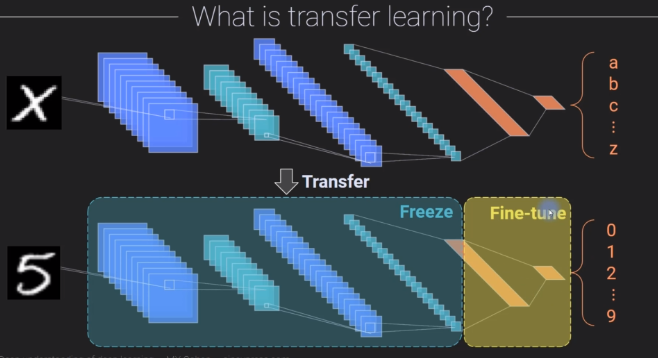

In [39]:
# create a class for the model
def createTheEMNISTNet(LR, printtoggle=False):

    class emnistNet(nn.Module):
        
        def __init__(self,printtoggle):
            super().__init__()

            ### convolution layers
            # 1:in_channels (gray scale) , 10:out_channels, stride=1 (No striding)
            self.conv1 = nn.Conv2d( 1,10,kernel_size=5,stride=1,padding=1)
            # since, it's a square image, therefore row_size = column_size
            # size: np.floor( (28+2*1-5)/1 )+1 = 26/2 = 13 (/2 because maxpool)

            self.conv2 = nn.Conv2d(10,20,kernel_size=5,stride=1,padding=1)
            # size: np.floor( (13+2*1-5)/1 )+1 = 11/2 = 5 (/2 because maxpool)

            # compute the number of units in FClayer (number of outputs of conv2)
            # fc1 layer has no padding or kernel, so set to padding=0 and stride=1
            expectSize = np.floor( (5+2*0-1)/1 ) + 1 
            # Since, it's a square image, therefore num_pixels_rows = num_pixels_cols
            # otherwise, we'll have to calculate 'expectSize' for rows and columns separately
            # 20:out_channels from conv2 layer
            expectSize = 20*int(expectSize**2)
            # expectSize : indicating number if input features per image

            ### fully-connected layer
            # 50 : number of Neurons
            self.fc1 = nn.Linear(expectSize,75)

            ### output layer
            self.out = nn.Linear(75,26)

            # toggle for printing out tensor sizes during forward prop
            self.print = printtoggle

        # forward pass
        def forward(self,x):

            print(f'Input: {x.shape}') if self.print else None

            # convolution -> maxpool -> relu
            # 2 : pooling window_size
            x = F.relu( F.max_pool2d( self.conv1(x), 2) )
            print(f'Layer conv1-->pool1: {x.shape}') if self.print else None

            # Again: convolution -> maxpool -> relu
            x = F.relu( F.max_pool2d( self.conv2(x), 2) )
            print(f'Layer conv2-->pool2: {x.shape}') if self.print else None

            # reshape for linear layer
            # torch.numel(input) : Returns the total number of elements in the input tensor.
            nUnits = x.shape.numel()/x.shape[0]

            # Reshaping
            x = x.view(-1,int(nUnits))

            if self.print: print(f'Vectorize : {x.shape}')

            # linear layers
            x = F.relu( self.fc1(x) )
            if self.print: print(f'Layer fc1: {x.shape}')

            x = self.out(x)
            if self.print: print(f'Layer out: {x.shape}')

            return x
  
    # create the model instance
    model = emnistNet(printtoggle)

    # loss function
    lossfunc = nn.CrossEntropyLoss()

    # optimizer
    optimizer = torch.optim.Adam(model.parameters(),lr=LR)

    return model, lossfunc, optimizer

#### Testing the shapes at each layer

In [40]:
# test the model with one batch
test_net, test_lossfun, test_optimizer = createTheEMNISTNet(LR=0.001,printtoggle=True)

X,y = next(iter(train_loader_emnist))
yHat = test_net(X)

# check sizes of model outputs and target variable
print(' ')
print(yHat.shape)
print(y.shape)

# now let's compute the loss
loss = test_lossfun(yHat,y)
print(' ')
print('Loss:')
print(loss)

# 32 : batch size

Input: torch.Size([32, 1, 28, 28])
Layer conv1-->pool1: torch.Size([32, 10, 13, 13])
Layer conv2-->pool2: torch.Size([32, 20, 5, 5])
Vectorize : torch.Size([32, 500])
Layer fc1: torch.Size([32, 75])
Layer out: torch.Size([32, 26])
 
torch.Size([32, 26])
torch.Size([32])
 
Loss:
tensor(3.2723, grad_fn=<NllLossBackward0>)


## 5. Model Training

In [42]:
def function2trainTheModel(Model, lossfunc, optimizer, train_loader, test_loader, epochs):

    losses   = torch.zeros(epochs)
    trainAcc = []
    testAcc  = []

    # loop over epochs
    for epochi in range(epochs):

        # switch on training mode
        Model.train()

        # loop over training data batches
        batchAcc  = []
        batchLoss = []
    
        # Batch Training
        for X,y in train_loader:

            # Forward pass and loss
            yHat_train = Model(X)
            loss = lossfunc(yHat_train,y)

            # Backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Loss from this batch
            batchLoss.append(loss.item())

            # Compute accuracy
            matches = torch.argmax(yHat_train,axis=1) == y     # booleans (false/true)
            matchesNumeric = matches.float()             # convert to numbers (0/1)
            accuracyPct = 100*torch.mean(matchesNumeric) # average and x100 
            batchAcc.append( accuracyPct )               # add to list of accuracies
        # End of batch loop...

        # Now that we've trained through the batches, get their average training accuracy
        trainAcc.append( np.round(np.mean(batchAcc),2 ))

        # Get average losses across the batches
        losses[epochi] = np.round(np.mean(batchLoss),2)

        # test accuracy
        Model.eval()
        X,y = next(iter(test_loader)) # extract X,y from test dataloader
        with torch.no_grad():         # deactivates autograd
            yHat_test = Model(X)
      
        # compare the following really long line of code to the training accuracy lines
        testAcc.append( np.round(100*torch.mean((torch.argmax(yHat_test,axis=1)==y).float()),2 ) )
        # End epochs

    # function output
    return trainAcc,testAcc,losses,Model

## 6.  Run the model 

In [45]:
CNN_model_emnist,lossfunc_emnist,optimizer_emnist = createTheEMNISTNet(LR=0.001, printtoggle=False)

In [46]:
# took 10mins 
TrainAcc_emnist,TestAcc_emnist,Losses_emnist,trained_Model_emnist=function2trainTheModel(Model=CNN_model_emnist , 
                                                                     lossfunc=lossfunc_emnist , 
                                                                     optimizer=optimizer_emnist,
                                                                     train_loader=train_loader_emnist , 
                                                                     test_loader=test_loader_emnist, 
                                                                     epochs=10)

## 7. Results Visualization - mnist

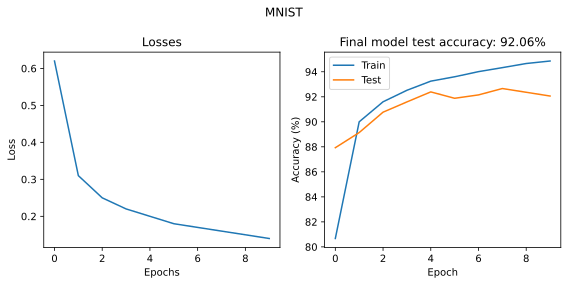

In [47]:
fig,ax = plt.subplots(1,2,figsize=(8,4))

ax[0].plot(Losses_emnist.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_title('Losses')

ax[1].plot(TrainAcc_emnist,label='Train')
ax[1].plot(TestAcc_emnist, label='Test')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_xlabel('Epoch')
ax[1].set_title(f'Final model test accuracy: {TestAcc_emnist[-1]:.2f}%')

ax[1].legend()
fig.suptitle("MNIST")
fig.tight_layout()

plt.show()

## Transfer learning from EMNIST to MNIST

In [53]:
# testing
for para in trained_Model_emnist.named_parameters():
    # Returns a tuple containing name of the parameter and value of it.
    print(para[0])
    print("\n**************\n")

conv1.weight

**************

conv1.bias

**************

conv2.weight

**************

conv2.bias

**************

fc1.weight

**************

fc1.bias

**************

out.weight

**************

out.bias

**************



In [54]:
# testing
for para in trained_Model_emnist.named_parameters():
    # Returns a tuple containing name of the parameter and value of it.
    print(para)
    print("\n**************\n")

('conv1.weight', Parameter containing:
tensor([[[[-0.2061,  0.1923,  0.2488,  0.4468, -0.0544],
          [-0.0527, -0.2915,  0.0873,  0.5383,  0.0482],
          [-0.1766, -0.2346, -0.2564,  0.1323,  0.4478],
          [-0.2166, -0.1982, -0.2612,  0.1473,  0.2713],
          [-0.1519, -0.4243, -0.2443,  0.2863,  0.2388]]],


        [[[-0.1361,  0.0078,  0.0764,  0.2289,  0.2446],
          [-0.1362, -0.2093, -0.2042, -0.0385,  0.3954],
          [-0.0897, -0.3585,  0.0127,  0.0914,  0.1998],
          [-0.2099, -0.2908, -0.1616,  0.0932,  0.1587],
          [-0.1713, -0.2899,  0.0405, -0.0270,  0.3058]]],


        [[[ 0.0182,  0.1077, -0.3525, -0.6575, -0.4561],
          [ 0.2304,  0.3377, -0.3130, -0.3956, -0.3416],
          [ 0.3133,  0.2138, -0.0274, -0.4114, -0.3990],
          [ 0.2144,  0.6325,  0.2703,  0.2000, -0.3332],
          [ 0.0139,  0.1614,  0.4393,  0.1867, -0.1681]]],


        [[[-0.0737,  0.2879,  0.2873,  0.1051,  0.1655],
          [ 0.0443,  0.0288, -0.6083,

### (i) Change the architecture to match the output categories of MNIST.

In [51]:
# create a class for the model
def createTheMNISTNet(LR, printtoggle=False):

    class mnistNet(nn.Module):
        
        def __init__(self,printtoggle):
            super().__init__()

            ### convolution layers
            # 1:in_channels (gray scale) , 10:out_channels, stride=1 (No striding)
            self.conv1 = nn.Conv2d( 1,10,kernel_size=5,stride=1,padding=1)
            # since, it's a square image, therefore row_size = column_size
            # size: np.floor( (28+2*1-5)/1 )+1 = 26/2 = 13 (/2 because maxpool)

            self.conv2 = nn.Conv2d(10,20,kernel_size=5,stride=1,padding=1)
            # size: np.floor( (13+2*1-5)/1 )+1 = 11/2 = 5 (/2 because maxpool)

            # compute the number of units in FClayer (number of outputs of conv2)
            # fc1 layer has no padding or kernel, so set to padding=0 and stride=1
            expectSize = np.floor( (5+2*0-1)/1 ) + 1 
            # Since, it's a square image, therefore num_pixels_rows = num_pixels_cols
            # otherwise, we'll have to calculate 'expectSize' for rows and columns separately
            # 20:out_channels from conv2 layer
            expectSize = 20*int(expectSize**2)
            # expectSize : indicating number if input features per image

            ### fully-connected layer
            # 50 : number of Neurons
            self.fc1 = nn.Linear(expectSize,75)

            ### output layer
            self.out = nn.Linear(75,10)

            # toggle for printing out tensor sizes during forward prop
            self.print = printtoggle

        # forward pass
        def forward(self,x):

            print(f'Input: {x.shape}') if self.print else None

            # convolution -> maxpool -> relu
            # 2 : pooling window_size
            x = F.relu( F.max_pool2d( self.conv1(x), 2) )
            print(f'Layer conv1-->pool1: {x.shape}') if self.print else None

            # Again: convolution -> maxpool -> relu
            x = F.relu( F.max_pool2d( self.conv2(x), 2) )
            print(f'Layer conv2-->pool2: {x.shape}') if self.print else None

            # reshape for linear layer
            # torch.numel(input) : Returns the total number of elements in the input tensor.
            nUnits = x.shape.numel()/x.shape[0]

            # Reshaping
            x = x.view(-1,int(nUnits))

            if self.print: print(f'Vectorize : {x.shape}')

            # linear layers
            x = F.relu( self.fc1(x) )
            if self.print: print(f'Layer fc1: {x.shape}')

            x = self.out(x)
            if self.print: print(f'Layer out: {x.shape}')

            return x
  
    # create the model instance
    model = mnistNet(printtoggle)

    # loss function
    lossfunc = nn.CrossEntropyLoss()

    # optimizer
    optimizer = torch.optim.Adam(model.parameters(),lr=LR)

    return model, lossfunc, optimizer

In [57]:
CNN_model_mnist,lossfunc_mnist,optimizer_mnist = createTheMNISTNet(LR=0.001, printtoggle=False)

In [71]:
# Testing MNIST
for param in CNN_model_mnist.named_parameters():
    
    print(param[0])
    print("**********\n")

conv1.weight
**********

conv1.bias
**********

conv2.weight
**********

conv2.bias
**********

fc1.weight
**********

fc1.bias
**********

out.weight
**********

out.bias
**********



In [62]:
for param in CNN_model_mnist.named_parameters():
    print(param)

('conv1.weight', Parameter containing:
tensor([[[[ 0.1416, -0.1789,  0.0583,  0.0055, -0.0482],
          [-0.0996,  0.0655,  0.1067,  0.0109, -0.0628],
          [ 0.1524,  0.1205,  0.0421,  0.0925, -0.1495],
          [-0.0238, -0.0561, -0.0264, -0.1648, -0.0808],
          [-0.1812,  0.1149,  0.1352,  0.1097,  0.0056]]],


        [[[ 0.1437, -0.1625, -0.1111,  0.0344, -0.0867],
          [ 0.0028,  0.1998, -0.0671, -0.0637,  0.0902],
          [-0.0451, -0.1275, -0.1999,  0.0211, -0.0441],
          [ 0.1790,  0.1390,  0.1261, -0.1683, -0.1682],
          [-0.1516,  0.1676,  0.0453, -0.0698, -0.0155]]],


        [[[ 0.1959, -0.1167, -0.1360,  0.1677,  0.0319],
          [ 0.0266,  0.1529,  0.1347,  0.0696, -0.0559],
          [ 0.1245, -0.1894, -0.1078, -0.1524,  0.0278],
          [-0.0755,  0.1643,  0.1909,  0.0628,  0.1258],
          [ 0.1320,  0.1139, -0.0954,  0.0941, -0.1963]]],


        [[[ 0.0992,  0.0454, -0.1965,  0.0980, -0.0260],
          [-0.0651, -0.0169, -0.1760,

In [58]:
# testing EMNIST
for para in trained_Model_emnist.named_parameters():
    # Returns a tuple containing name of the parameter and value of it.
    print(para[0])
    print("\n**************\n")

conv1.weight

**************

conv1.bias

**************

conv2.weight

**************

conv2.bias

**************

fc1.weight

**************

fc1.bias

**************

out.weight

**************

out.bias

**************



In [72]:
import copy

In [ ]:
# NOTE : Direct copying will not work because deepcopy() doesn't copy many features of classes.
# fashionNet = copy.deepcopy( numberNet )

In [73]:
# Replace all the weights in TARGET model from SOURCE model
for target,source in zip( CNN_model_mnist.named_parameters(), trained_Model_emnist.named_parameters()):
    
    if target[0] not in ["out.weight", "out.bias"]:
        target[1].data = copy.deepcopy( source[1].data ) 

In [74]:
# The second print function shows the zeros matrix because the two models have identical weights. 
print( CNN_model_mnist.conv1.weight[0] - trained_Model_emnist.conv1.weight[0] )

tensor([[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]], grad_fn=<SubBackward0>)


## 10. Now re-train the MNIST network on the mnist data completely

In [ ]:
# trainAcc,testAcc,losses,fashionNet = function2trainTheModel(
#                                          fashionNet,fashion_train_loader,fashion_test_loader,1)

In [76]:
# took 5mins 
TrainAcc_mnist, TestAcc_mnist, Losses_mnist, trained_Model_mnist=function2trainTheModel(Model=CNN_model_mnist , 
                                                                     lossfunc=lossfunc_mnist , 
                                                                     optimizer=optimizer_mnist,
                                                                     train_loader=train_loader_mnist , 
                                                                     test_loader=test_loader_mnist, 
                                                                     epochs=10)

## 11. Results Visualization - Mnist

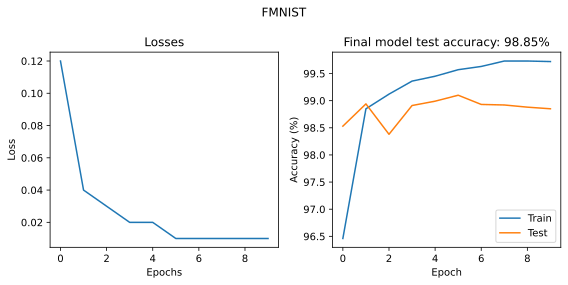

In [77]:
fig,ax = plt.subplots(1,2,figsize=(8,4))

ax[0].plot(Losses_mnist.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_title('Losses')

ax[1].plot(TrainAcc_mnist,label='Train')
ax[1].plot(TestAcc_mnist, label='Test')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_xlabel('Epoch')
ax[1].set_title(f'Final model test accuracy: {TestAcc_mnist[-1]:.2f}%')

ax[1].legend()
fig.suptitle("FMNIST")
fig.tight_layout()

plt.show()

## Freezing the convolution layer

#### (i) Create the fresh instance

In [78]:
CNN_model_mnist2,lossfunc_mnist2,optimizer_mnist2 = createTheMNISTNet(LR=0.001, printtoggle=False)

#### (ii) Transfer learning

In [79]:
# Replace all the weights in TARGET model from SOURCE model
for target,source in zip( CNN_model_mnist2.named_parameters(), trained_Model_emnist.named_parameters()):
    
    if target[0] not in ["out.weight", "out.bias"]:
        target[1].data = copy.deepcopy( source[1].data ) 

In [80]:
# The second print function shows the zeros matrix because the two models have identical weights. 
print( CNN_model_mnist2.conv1.weight[0] - trained_Model_emnist.conv1.weight[0] )

tensor([[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]], grad_fn=<SubBackward0>)


#### (iii) Freezing the convolution layer

conv1.weight

**************

conv1.bias

**************

conv2.weight

**************

conv2.bias

**************

fc1.weight

**************

fc1.bias

**************

out.weight

**************

out.bias

In [81]:
for p in CNN_model_mnist2.named_parameters():
    
    if ('conv' in p[0]) :
        p[1].requires_grad = False
        


In [82]:
for p in CNN_model_mnist2.named_parameters():
    
    print(p)

('conv1.weight', Parameter containing:
tensor([[[[-0.2061,  0.1923,  0.2488,  0.4468, -0.0544],
          [-0.0527, -0.2915,  0.0873,  0.5383,  0.0482],
          [-0.1766, -0.2346, -0.2564,  0.1323,  0.4478],
          [-0.2166, -0.1982, -0.2612,  0.1473,  0.2713],
          [-0.1519, -0.4243, -0.2443,  0.2863,  0.2388]]],


        [[[-0.1361,  0.0078,  0.0764,  0.2289,  0.2446],
          [-0.1362, -0.2093, -0.2042, -0.0385,  0.3954],
          [-0.0897, -0.3585,  0.0127,  0.0914,  0.1998],
          [-0.2099, -0.2908, -0.1616,  0.0932,  0.1587],
          [-0.1713, -0.2899,  0.0405, -0.0270,  0.3058]]],


        [[[ 0.0182,  0.1077, -0.3525, -0.6575, -0.4561],
          [ 0.2304,  0.3377, -0.3130, -0.3956, -0.3416],
          [ 0.3133,  0.2138, -0.0274, -0.4114, -0.3990],
          [ 0.2144,  0.6325,  0.2703,  0.2000, -0.3332],
          [ 0.0139,  0.1614,  0.4393,  0.1867, -0.1681]]],


        [[[-0.0737,  0.2879,  0.2873,  0.1051,  0.1655],
          [ 0.0443,  0.0288, -0.6083,

#### (iv)  Now re-train the MNIST network on the mnist data completely with freezed Conv layer

In [ ]:
# trainAcc,testAcc,losses,fashionNet = function2trainTheModel(
#                                          fashionNet,fashion_train_loader,fashion_test_loader,1)

In [ ]:
# CNN_model_mnist2,lossfunc_mnist2,optimizer_mnist2 

In [83]:
# took 5mins 
TrainAcc_mnist2, TestAcc_mnist2, Losses_mnist2, trained_Model_mnist2=function2trainTheModel(Model=CNN_model_mnist2 , 
                                                                     lossfunc=lossfunc_mnist2 , 
                                                                     optimizer=optimizer_mnist2,
                                                                     train_loader=train_loader_mnist , 
                                                                     test_loader=test_loader_mnist, 
                                                                     epochs=10)

#### (v)  Results Visualization - Mnist with freeze conv layer

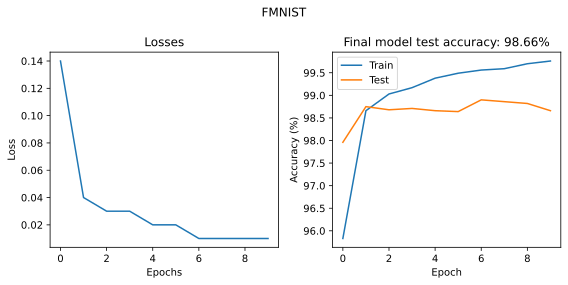

In [84]:
fig,ax = plt.subplots(1,2,figsize=(8,4))

ax[0].plot(Losses_mnist2.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_title('Losses')

ax[1].plot(TrainAcc_mnist2,label='Train')
ax[1].plot(TestAcc_mnist2, label='Test')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_xlabel('Epoch')
ax[1].set_title(f'Final model test accuracy: {TestAcc_mnist2[-1]:.2f}%')

ax[1].legend()
fig.suptitle("FMNIST")
fig.tight_layout()

plt.show()

### Conclusion :
- Therefore, transfer learning worked with convolution layer freezed.